In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pickle
with open('/content/drive/MyDrive/Thesis/textdata.pkl', 'rb') as f:
  dx = pickle.load(f)

In [ ]:
import pandas as pd
df_text = pd.read_csv("/content/STOXX50E.csv")
df_text.head()

,date,STOXX50E
0,111103,-0.27
1,111208,-0.87
2,120112,-0.59
3,120209,-0.25
4,120308,-0.22


In [ ]:
df_text['STOXX50E'] = df_text['STOXX50E'].apply(lambda x : float(x.replace(',','.')))


AttributeError: ignored

In [ ]:
import re
from tqdm import tqdm
dy={}
for keys in tqdm(dx.keys()):
  temp = re.findall(r'\d+', keys)
  dy[temp[0]]=[]
  for k in dx.keys():
    if(keys[-15:-9]==k[-15:-9]):
      dy[temp[0]].append(k)

100%|██████████| 25360/25360 [02:43<00:00, 154.75it/s]


In [ ]:
for key in dy.keys():
  dy[key]=sorted(dy[key])

In [ ]:
dict(sorted(dy.items()))

{'111103': ['/content/Final Data/111103/texts/111103_T1.txt',
  '/content/Final Data/111103/texts/111103_T2.txt',
  '/content/Final Data/111103/texts/111103_T3.txt',
  '/content/Final Data/111103/texts/111103_T4.txt',
  '/content/Final Data/111103/texts/111103_T5.txt',
  '/content/Final Data/111103/texts/111103_T6.txt',
  '/content/Final Data/111103/texts/111103_T7.txt',
  '/content/Final Data/111103/texts/111103_T8.txt',
  '/content/Final Data/111103/texts/111103_T9.txt'],
 '111208': ['/content/Final Data/111208/texts/111208_T10.txt',
  '/content/Final Data/111208/texts/111208_T11.txt',
  '/content/Final Data/111208/texts/111208_T12.txt',
  '/content/Final Data/111208/texts/111208_T13.txt',
  '/content/Final Data/111208/texts/111208_T14.txt',
  '/content/Final Data/111208/texts/111208_T15.txt',
  '/content/Final Data/111208/texts/111208_T16.txt',
  '/content/Final Data/111208/texts/111208_T17.txt',
  '/content/Final Data/111208/texts/111208_T18.txt',
  '/content/Final Data/111208/text

In [ ]:
import pandas as pd
df = pd.read_csv("/content/STOXX50E.csv")
df

,date,STOXX50E
0,111103,-0.27
1,111208,-0.87
2,120112,-0.59
3,120209,-0.25
4,120308,-0.22
...,...,...
89,210610,0.31
90,210722,-0.30
91,210909,0.16
92,211028,-0.15


In [ ]:
dz={}
for i in range(94):
  for key in dy.keys():
    if(str(df['date'][i])==key):
      dz[key]=dy[key]

In [ ]:
a=[]
max=0
for k in dz.keys():
  b=[]
  x=len(dz[k])
  if(x>max):
    max=x
    ind = k
  for i in range(len(dz[k])):
    b.append(dx[dz[k][i]].numpy())
  a.append(b)

In [ ]:
import numpy as np
for i in range(len(a)):
  dif = max - len(a[i])
  z = np.zeros((768))
  for j in range(dif):
    a[i].append(z)

In [ ]:
a=np.asarray(a)

In [ ]:
a.shape

(94, 253, 768)

In [ ]:
for i in range(94):
  df['STOXX50E'][i]=float(df['STOXX50E'][i].replace(',','.'))

AttributeError: ignored

In [ ]:
import re
dy={}
tempy=[]
xyz = []
for keys in dx.keys():
  temp = re.findall(r'\d+', keys)
  xyz.append(temp[0])

for keys in set(xyz):
  temp = re.findall(r'\d+', keys)
  for i in range(len(list(df['date']))):
    
    if(str(temp[0])==str(df['date'][i])):
     
      tempy.append(df['STOXX50E'][i])

In [ ]:
tempy=np.asarray(tempy)
tempyy = np.reshape(tempy,(94,1))
tempyy.shape

(94, 1)

In [ ]:
tempy

array([-0.25,  2.04, -0.49,  0.31, -0.16, -0.77,  0.86,  0.48, -3.  ,
       -0.3 ,  0.1 , -0.11, -2.43,  0.2 , -0.27, -0.59,  0.16, -0.87,
        0.55, -0.59, -0.38,  0.11,  0.51, -0.21,  0.54, -0.45, -0.78,
       -0.36, -0.47, -0.14, -0.27, -0.28,  0.36,  0.04,  1.39,  0.27,
       -0.06,  0.98,  0.36,  0.15, -0.05,  0.01,  0.51, -0.22, -1.36,
        0.89, -0.45, -0.15, -1.45, -1.48, -0.1 , -0.1 ,  0.03, -0.26,
       -1.95, -0.12, -1.47,  0.61, -0.89, -0.59,  0.23, -0.35,  0.12,
        0.02, -0.37,  1.36,  0.43, -1.31,  0.38, -0.39,  0.04,  0.08,
        0.55, -0.67, -0.09, -0.06, -0.14,  0.28, -0.2 ,  0.76,  1.04,
        0.24, -0.36, -0.23, -0.27, -0.3 ,  0.1 ,  0.13, -0.03, -0.9 ,
        0.03, -0.51, -0.72, -0.52])

In [ ]:
for i in range(94):
  for j in range(253):
    a[i][j] = np.asarray(a[i][j])

In [ ]:
print(np.isnan(a))
print(np.any(np.isnan(a)))

[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 ...

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False Fal

In [ ]:
for i in range(92):
  prenor=a[i]
  postnor=prenor
  postnor=(prenor-prenor[0].min())/(prenor.max()-prenor.min())
  a[i]=np.asarray(postnor)

In [ ]:
a

array([[[ 7.79677039e-01,  8.61542221e-01,  9.07051574e-01, ...,
          7.91890402e-01,  8.40479658e-01,  8.54070043e-01],
        [ 8.30626789e-01,  8.55021117e-01,  8.68315651e-01, ...,
          8.34100520e-01,  8.48980681e-01,  8.53558592e-01],
        [ 8.32765996e-01,  8.54988272e-01,  8.67281580e-01, ...,
          8.36144834e-01,  8.49232665e-01,  8.53037021e-01],
        ...,
        [ 8.52596534e-01,  8.52596534e-01,  8.52596534e-01, ...,
          8.52596534e-01,  8.52596534e-01,  8.52596534e-01],
        [ 8.52596534e-01,  8.52596534e-01,  8.52596534e-01, ...,
          8.52596534e-01,  8.52596534e-01,  8.52596534e-01],
        [ 8.52596534e-01,  8.52596534e-01,  8.52596534e-01, ...,
          8.52596534e-01,  8.52596534e-01,  8.52596534e-01]],

       [[ 1.82790032e-01,  1.99878921e-01,  2.11579525e-01, ...,
          1.86683212e-01,  1.97043220e-01,  2.01049900e-01],
        [ 1.83843773e-01,  1.99953225e-01,  2.10647080e-01, ...,
          1.87594644e-01,  1.97708434e

### ***Unimodal Feature Extraction***

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Input, Dense, GlobalMaxPooling1D, Masking, Dropout, TimeDistributed
from keras.models import Model
import tensorflow as tf
input_data = Input(shape=(192,768,))
lstm = Bidirectional(LSTM(64, activation='tanh', return_sequences = True, dropout=0.6))(input_data)
inter = Dropout(0.6)(lstm)
inter1 = TimeDistributed(Dense(64,activation='tanh'))(inter)
inter2 = GlobalMaxPooling1D()(inter1)
inter3 = Dense(1,activation = 'tanh')(inter2)

model = Model(input_data, inter3)
featred = Model(input_data,inter2)

In [ ]:
model.compile(loss='mse',optimizer='adam')

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 253, 768)]        0         
                                                                 
 bidirectional (Bidirectiona  (None, 253, 128)         426496    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 253, 128)          0         
                                                                 
 time_distributed (TimeDistr  (None, 253, 256)         33024     
 ibuted)                                                         
                                                                 
 global_max_pooling1d (Globa  (None, 256)              0         
 lMaxPooling1D)                                                  
                                                             

In [ ]:
model.fit(a,tempyy,epochs=100,batch_size=4)
featurestext = featred.predict(a)

Epoch 1/100
24/24 [==============================] - 9s 20ms/step - loss: 0.6125
Epoch 2/100
24/24 [==============================] - 0s 19ms/step - loss: 0.6223
Epoch 3/100
24/24 [==============================] - 0s 19ms/step - loss: 0.5507
Epoch 4/100
24/24 [==============================] - 0s 19ms/step - loss: 0.6431
Epoch 5/100
24/24 [==============================] - 0s 19ms/step - loss: 0.5345
Epoch 6/100
24/24 [==============================] - 0s 19ms/step - loss: 0.5699
Epoch 7/100
24/24 [==============================] - 0s 19ms/step - loss: 0.5439
Epoch 8/100
24/24 [==============================] - 0s 19ms/step - loss: 0.6654
Epoch 9/100
24/24 [==============================] - 0s 19ms/step - loss: 0.5732
Epoch 10/100
24/24 [==============================] - 0s 19ms/step - loss: 0.5745
Epoch 11/100
24/24 [==============================] - 0s 19ms/step - loss: 0.6050
Epoch 12/100
24/24 [==============================] - 0s 19ms/step - loss: 0.5699
Epoch 13/100
24/24 [=====

In [ ]:
with open('featurestext.pkl','wb') as f : pickle.dump(featurestext,f)


In [ ]:
featurestext.shape

(94, 256)

#Final Training and Prediction

## ML model

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt



In [2]:
X_train,X_test,y_train,y_test = train_test_split(featurestext,tempyy,test_size=0.1,shuffle=False)

NameError: ignored

In [ ]:
clf = RandomForestRegressor()


In [ ]:
clf.fit(X_train,y_train)
predRF = clf.predict(X_test)



In [ ]:
mse(y_test,predRF)

In [ ]:
plt.plot(list(y_test),label='actual')
plt.plot(list(predRF),label='predicted')
plt.title("Actual vs predicted values")
plt.legend()
plt.show()

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model = XGBRegressor()

In [ ]:
model.fit(X_train,y_train)

In [ ]:
xgb_pred = model.predict(X_test)

In [ ]:
mse(y_test,xgb_pred)


In [ ]:
plt.plot(list(y_test),label='actual')
plt.plot(list(xgb_pred),label='predicted')
plt.title("Actual vs predicted values")
plt.legend()
plt.show()

## DL Model

In [ ]:
data = featurestext.copy()

In [ ]:
data = np.reshape(data,(94,1,256))
y = tempyy

In [ ]:
X_train_dl, X_test_dl, y_train_dl,y_test_dl = train_test_split(data,y,test_size=0.2,shuffle=False)

In [ ]:
def elliptic_paraboloid_loss(x, y, c_diff_sign = 1, c_same_sign = 1):

    t = tf.constant(np.pi / 4)

    x_rot = (x * tf.math.cos(t)) + (y * tf.math.sin(t))

    y_rot = (x * -tf.math.sin(t)) + (y * tf.math.cos(t))

    z_1 = ((tf.math.pow(x_rot,2)) / c_diff_sign) + (tf.math.pow(y_rot,2) / c_same_sign)

    z = z_1*abs(x^2-y^2)
    return(z)

In [ ]:
input_data = Input(shape=(1,256,))
lstm = Bidirectional(LSTM(65, activation='tanh', return_sequences = True, dropout=0.6))(input_data)
drop = Dropout(0.9)(lstm)
gmp = GlobalMaxPooling1D()(drop)
fc1 = Dense(65,activation='tanh')(gmp)
drop2 = Dropout(0.5)(fc1)
fc2 = Dense(32,activation='tanh')(drop2)
fc3 = Dense(16,activation='tanh')(fc2)
drop3 = Dropout(0.5)(fc3)
fc4 = Dense(8,activation='tanh')(drop3)
fc5 = Dense(4,activation='tanh')(fc4)
fc6 = Dense(2,activation='tanh')(fc5)
inter3 = Dense(1,activation = 'tanh')(fc6)

model = Model(input_data, inter3)

model.compile(loss='mse',optimizer='rmsprop',metrics=[tf.keras.metrics.MeanSquaredError()])
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1, 256)]          0         
                                                                 
 bidirectional_5 (Bidirectio  (None, 1, 130)           167440    
 nal)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 1, 130)            0         
                                                                 
 global_max_pooling1d_5 (Glo  (None, 130)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_30 (Dense)            (None, 65)                8515      
                                                                 
 dropout_14 (Dropout)        (None, 65)                0   

In [ ]:
history = model.fit(X_train_dl,y_train_dl,epochs=500,batch_size=5)

Epoch 1/500
15/15 [==============================] - 3s 6ms/step - loss: 0.7144 - mean_squared_error: 0.7144
Epoch 2/500
15/15 [==============================] - 0s 6ms/step - loss: 0.6244 - mean_squared_error: 0.6244
Epoch 3/500
15/15 [==============================] - 0s 6ms/step - loss: 0.6438 - mean_squared_error: 0.6438
Epoch 4/500
15/15 [==============================] - 0s 6ms/step - loss: 0.6889 - mean_squared_error: 0.6889
Epoch 5/500
15/15 [==============================] - 0s 6ms/step - loss: 0.6141 - mean_squared_error: 0.6141
Epoch 6/500
15/15 [==============================] - 0s 6ms/step - loss: 0.6600 - mean_squared_error: 0.6600
Epoch 7/500
15/15 [==============================] - 0s 6ms/step - loss: 0.6301 - mean_squared_error: 0.6301
Epoch 8/500
15/15 [==============================] - 0s 6ms/step - loss: 0.6385 - mean_squared_error: 0.6385
Epoch 9/500
15/15 [==============================] - 0s 6ms/step - loss: 0.6171 - mean_squared_error: 0.6171
Epoch 10/500
15/15 

dict_keys(['loss', 'mean_squared_error'])


NameError: ignored

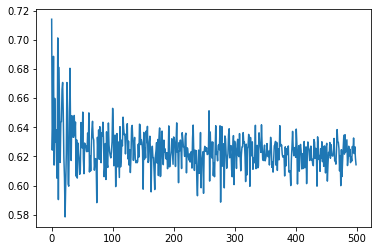

In [ ]:
dl_pred = model.predict(X_test_dl)
plt.plot(history.history['loss'])

In [ ]:
np.sqrt(mse(y_test_dl,dl_pred))

0.45886453138383826

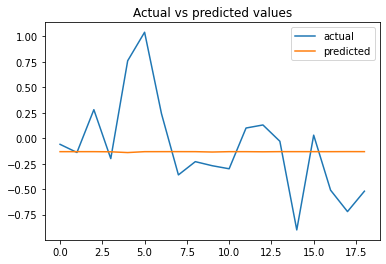

In [ ]:
plt.plot(list(y_test_dl),label='actual')
plt.plot(list(dl_pred),label='predicted')
plt.title("Actual vs predicted values")
plt.legend()
plt.show()